In [1]:
# Importing all required packages
import tensorflow as tf
import keras
from keras.models import Sequential
from keras.layers import Dense, Conv2D , MaxPool2D , Flatten , Dropout 
from keras.preprocessing.image import ImageDataGenerator
from keras.optimizers import Adam
from keras.layers import MaxPooling2D
from sklearn.metrics import classification_report,confusion_matrix

Using TensorFlow backend.


In [2]:
tf.test.is_built_with_cuda()

True

In [3]:
tf.config.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU'),
 PhysicalDevice(name='/physical_device:GPU:1', device_type='GPU')]

In [4]:
from keras import backend as K
K.clear_session()

In [5]:
# Initialising the CNN
classifier = Sequential()

# Step 1 - Convolution
classifier.add(Conv2D(32, (3, 3), input_shape = (64, 64, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
# add second convolution
classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

# add third convolution
classifier.add(Conv2D(64, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))

# add fourth convolution
classifier.add(Conv2D(128, (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(0.4))




In [6]:
# Step 3 - Flattening
classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 128, activation = 'relu'))

classifier.add(Dense(units = 4, activation = 'softmax'))

classifier.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 62, 62, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 31, 31, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 29, 29, 32)        9248      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 12, 12, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 6, 6, 64)          0

In [7]:
# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [8]:
# Part 2 - Fitting the CNN to the images

from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [9]:
training_set = train_datagen.flow_from_directory('./data_files/train_val_test/train/',
                                                 target_size = (64, 64),
                                                 batch_size = 10)
print(training_set.class_indices)

test_set = test_datagen.flow_from_directory('./data_files/train_val_test/test/',
                                            target_size = (64, 64),
                                            batch_size = 10)

Found 2279 images belonging to 4 classes.
{'hotel': 0, 'mountain': 1, 'sea': 2, 'tree': 3}
Found 289 images belonging to 4 classes.


In [10]:
model = classifier.fit_generator(training_set,
                         steps_per_epoch = 16,
                         epochs = 200,
                         validation_data = test_set,    
                         validation_steps = 100)


Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/200
16/16 [==============================] - 9s 546ms/step - loss: 1.4073 - accuracy: 0.2688 - val_loss: 1.3751 - val_accuracy: 0.2803
Epoch 2/200
16/16 [==============================] - 2s 122ms/step - loss: 1.3588 - accuracy: 0.3000
Epoch 3/200
16/16 [==============================] - 2s 130ms/step - loss: 1.3579 - accuracy: 0.2750
Epoch 4/200
16/16 [==============================] - 2s 122ms/step - loss: 1.3305 - accuracy: 0.3063
Epoch 5/200
16/16 [==============================] - 2s 126ms/step - loss: 1.2728 - accuracy: 0.4500
Epoch 6/200
16/16 [==============================] - 1s 82ms/step - loss: 1.3151 - accuracy: 0.4000
Epoch 7/200
16/16 [==============================] - 2s 153ms/step - loss: 1.2893 - accuracy: 0.4437
Epoch 8/200
16/16 [==============================] - 2s 111ms/step - loss: 1.2935 - accuracy: 0.3562
Epoch 9/200
16/16 [==============================] - 3s 179ms/step - loss: 

/opt/conda/lib/python3.6/site-packages/PIL/Image.py:952: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


16/16 [==============================] - 2s 135ms/step - loss: 1.2752 - accuracy: 0.4313
Epoch 14/200
16/16 [==============================] - 2s 156ms/step - loss: 1.1714 - accuracy: 0.4500
Epoch 15/200
16/16 [==============================] - 3s 187ms/step - loss: 1.2232 - accuracy: 0.4563
Epoch 16/200
16/16 [==============================] - 2s 96ms/step - loss: 1.1723 - accuracy: 0.4563
Epoch 17/200
16/16 [==============================] - 3s 169ms/step - loss: 1.1924 - accuracy: 0.4500
Epoch 18/200
16/16 [==============================] - 3s 174ms/step - loss: 1.1594 - accuracy: 0.4062
Epoch 19/200
16/16 [==============================] - 2s 147ms/step - loss: 1.1597 - accuracy: 0.4563
Epoch 20/200
16/16 [==============================] - 2s 148ms/step - loss: 1.1580 - accuracy: 0.5188
Epoch 21/200
16/16 [==============================] - 1s 93ms/step - loss: 1.1585 - accuracy: 0.5000
Epoch 22/200
16/16 [==============================] - 2s 96ms/step - loss: 1.1362 - accuracy: 0.4

In [11]:
classifier.save("model.h5")
print("Saved model to disk")

Saved model to disk


In [14]:
import numpy as np
import glob
from stegano import lsb
import os
import concurrent.futures
from keras.preprocessing import image
from PIL import Image

input_locations = ['./data_files/train_val_test/train/sea/',
 './data_files/train_val_test/train/hotel/' ,
 './data_files/train_val_test/train/mountain/', 
 './data_files/train_val_test/train/tree/',
 './data_files/train_val_test/test/hotel/' ,
 './data_files/train_val_test/test/sea/', 
 './data_files/train_val_test/test/mountain/', 
 './data_files/train_val_test/test/tree/']

lookup = {
  "tree" : "sdfjksdj3234234s",
  "mountain" : "oio243234nsdf443",
  "sea" : "lopwrpw23834i445",
  "hotel" : "mnh876ertpow45bn"
}

def add_image_steganography(image_file):
    #print(image_file)  

    test_image = image.load_img(image_file, target_size = (64, 64))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis = 0)
    result = classifier.predict(test_image)
    training_set.class_indices

    key = '' 
    
    if result[0][0] == 1:
        key = 'hotel'
    elif result[0][0] == 3:
        key = 'mountain'
    elif result[0][0] == 2:
        key = 'sea'
    else:
        key = 'tree'
    
    if ".jpg"  in image_file.lower():
        #print(image_file)
        img = Image.open(image_file)
        img1 = img.convert("RGB")
        secret = lsb.hide(img1, lookup[key])
        secret.save("./output_data/" + key + "/" + os.path.basename(image_file))
      
    return True

def process_images(input_locations):
    for folder_location in input_locations: 
        print(folder_location)
        with concurrent.futures.ThreadPoolExecutor() as executor:
            image_files = glob.glob(folder_location + "*.*")
            for image_files, process_status in zip(image_files, executor.map(add_image_steganography, image_files)):
                print(f"A Steganography for {image_files} was processed with status as {process_status}")
            

process_images(input_locations)

./data_files/train_val_test/train/sea/


FileNotFoundError: [Errno 2] No such file or directory: './output_data/tree/images (20).jpg'

In [ ]:
# example of training an conditional gan
from numpy import expand_dims
from numpy import zeros
from numpy import ones
from numpy.random import randn
from numpy.random import randint
from keras.optimizers import Adam
from keras.models import Model
from keras.layers import Input
from keras.layers import Dense
from keras.layers import Reshape
from keras.layers import Flatten
from keras.layers import Conv2D
from keras.layers import Conv2DTranspose
from keras.layers import LeakyReLU
from keras.layers import Dropout
from keras.layers import Embedding
from keras.layers import Concatenate
import os
import numpy as np
from PIL import Image

def load_data():
    traindata_path = './data_files/valid_data'
    trainX = []
    trainy = []
    for label_id, folder in enumerate(os.listdir(traindata_path)):
        for image_name in os.listdir('{}/{}'.format(traindata_path, folder)):
            if os.path.isfile('{}/{}/{}'.format(traindata_path, folder, image_name)):
                image = Image.open('{}/{}/{}'.format(traindata_path, folder, image_name)).convert('LA')
                image = image.resize((28,28))
                trainX.append(np.array(image)[:,:,0])
                trainy.append(label_id)

    testdata_path = './data_files/train_val_test/test'
    testX = []
    testy = []
    for label_id, folder in enumerate(os.listdir(testdata_path)):
        for image_name in os.listdir('{}/{}'.format(testdata_path, folder)):
            if os.path.isfile('{}/{}/{}'.format(testdata_path, folder, image_name)):
                image = Image.open('{}/{}/{}'.format(testdata_path, folder, image_name)).convert('LA')
                image = image.resize((28,28))
                testX.append(np.array(image)[:,:,0])
                testy.append(label_id)

                
    trainX = np.array(trainX)
    trainy = np.array(trainy)

    testX = np.array(testX)
    testy = np.array(testy)
    # summarize the shape of the dataset
    print('Train', trainX.shape, trainy.shape)
    print('Test', testX.shape, testy.shape)

    return (trainX, trainy), (testX, testy)

 
# define the standalone discriminator model
def define_discriminator(in_shape=(28,28,1), n_classes=4):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# scale up to image dimensions with linear activation
	n_nodes = in_shape[0] * in_shape[1]
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((in_shape[0], in_shape[1], 1))(li)
	# image input
	in_image = Input(shape=in_shape)
	# concat label as a channel
	merge = Concatenate()([in_image, li])
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(merge)
	fe = LeakyReLU(alpha=0.2)(fe)
	# downsample
	fe = Conv2D(128, (3,3), strides=(2,2), padding='same')(fe)
	fe = LeakyReLU(alpha=0.2)(fe)
	# flatten feature maps
	fe = Flatten()(fe)
	# dropout
	fe = Dropout(0.4)(fe)
	# output
	out_layer = Dense(1, activation='sigmoid')(fe)
	# define model
	model = Model([in_image, in_label], out_layer)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
	return model
 
# define the standalone generator model
def define_generator(latent_dim, n_classes=4):
	# label input
	in_label = Input(shape=(1,))
	# embedding for categorical input
	li = Embedding(n_classes, 50)(in_label)
	# linear multiplication
	n_nodes = 7 * 7
	li = Dense(n_nodes)(li)
	# reshape to additional channel
	li = Reshape((7, 7, 1))(li)
	# image generator input
	in_lat = Input(shape=(latent_dim,))
	# foundation for 7x7 image
	n_nodes = 128 * 7 * 7
	gen = Dense(n_nodes)(in_lat)
	gen = LeakyReLU(alpha=0.2)(gen)
	gen = Reshape((7, 7, 128))(gen)
	# merge image gen and label input
	merge = Concatenate()([gen, li])
	# upsample to 14x14
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(merge)
	gen = LeakyReLU(alpha=0.2)(gen)
	# upsample to 28x28
	gen = Conv2DTranspose(128, (4,4), strides=(2,2), padding='same')(gen)
	gen = LeakyReLU(alpha=0.2)(gen)
	# output
	out_layer = Conv2D(1, (7,7), activation='tanh', padding='same')(gen)
	# define model
	model = Model([in_lat, in_label], out_layer)
	return model
 
# define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
	# make weights in the discriminator not trainable
	d_model.trainable = False
	# get noise and label inputs from generator model
	gen_noise, gen_label = g_model.input
	# get image output from the generator model
	gen_output = g_model.output
	# connect image output and label input from generator as inputs to discriminator
	gan_output = d_model([gen_output, gen_label])
	# define gan model as taking noise and label and outputting a classification
	model = Model([gen_noise, gen_label], gan_output)
	# compile model
	opt = Adam(lr=0.0002, beta_1=0.5)
	model.compile(loss='binary_crossentropy', optimizer=opt)
	return model
 
# load fashion mnist images
def load_real_samples():
	# load dataset
	(trainX, trainy), (_, _) = load_data()
	# expand to 3d, e.g. add channels
	X = expand_dims(trainX, axis=-1)
	# convert from ints to floats
	X = X.astype('float32')
	# scale from [0,255] to [-1,1]
	X = (X - 127.5) / 127.5
	return [X, trainy]
 
# # select real samples
def generate_real_samples(dataset, n_samples):
	# split into images and labels
	images, labels = dataset
	# choose random instances
	ix = randint(0, images.shape[0], n_samples)
	# select images and labels
	X, labels = images[ix], labels[ix]
	# generate class labels
	y = ones((n_samples, 1))
	return [X, labels], y
 
# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=4):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]
 
# use the generator to generate n fake examples, with class labels
def generate_fake_samples(generator, latent_dim, n_samples):
	# generate points in latent space
	z_input, labels_input = generate_latent_points(latent_dim, n_samples)
	# predict outputs
	images = generator.predict([z_input, labels_input])
	# create class labels
	y = zeros((n_samples, 1))
	return [images, labels_input], y
 
# train the generator and discriminator
def train(g_model, d_model, gan_model, dataset, latent_dim, n_epochs=2000, n_batch=128):
	bat_per_epo = int(dataset[0].shape[0] / n_batch)
	half_batch = int(n_batch / 2)
	# manually enumerate epochs
	for i in range(n_epochs):
		# enumerate batches over the training set
		for j in range(bat_per_epo):
			# get randomly selected 'real' samples
			[X_real, labels_real], y_real = generate_real_samples(dataset, half_batch)
			# update discriminator model weights
			d_loss1, _ = d_model.train_on_batch([X_real, labels_real], y_real)
			# generate 'fake' examples
			[X_fake, labels], y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
			# update discriminator model weights
			d_loss2, _ = d_model.train_on_batch([X_fake, labels], y_fake)
			# prepare points in latent space as input for the generator
			[z_input, labels_input] = generate_latent_points(latent_dim, n_batch)
			# create inverted labels for the fake samples
			y_gan = ones((n_batch, 1))
			# update the generator via the discriminator's error
			g_loss = gan_model.train_on_batch([z_input, labels_input], y_gan)
			# summarize loss on this batch
			print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
				(i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
	# save the generator model
	g_model.save('cgan_generator_2000epochs_128bs.h5')
	d_model.save('cgan_discriminator_2000epochs_128bs.h5')
    
 # size of the latent space
latent_dim = 100
# create the discriminator
d_model = define_discriminator()
# create the generator
g_model = define_generator(latent_dim)
# create the gan
gan_model = define_gan(g_model, d_model)
# load image data
dataset = load_real_samples()
# train model
train(g_model, d_model, gan_model, dataset, latent_dim)

Train (2689, 28, 28) (2689,)
Test (289, 28, 28) (289,)
>1, 1/21, d1=0.697, d2=0.694 g=0.692
>1, 2/21, d1=0.667, d2=0.698 g=0.689
>1, 3/21, d1=0.633, d2=0.704 g=0.683
>1, 4/21, d1=0.607, d2=0.714 g=0.675
>1, 5/21, d1=0.578, d2=0.727 g=0.665
>1, 6/21, d1=0.546, d2=0.742 g=0.656
>1, 7/21, d1=0.525, d2=0.757 g=0.651
>1, 8/21, d1=0.501, d2=0.756 g=0.659
>1, 9/21, d1=0.475, d2=0.737 g=0.693
>1, 10/21, d1=0.475, d2=0.695 g=0.739
>1, 11/21, d1=0.411, d2=0.646 g=0.792
>1, 12/21, d1=0.405, d2=0.619 g=0.804
>1, 13/21, d1=0.373, d2=0.624 g=0.793
>1, 14/21, d1=0.343, d2=0.649 g=0.758
>1, 15/21, d1=0.250, d2=0.698 g=0.707
>1, 16/21, d1=0.283, d2=0.811 g=0.628
>1, 17/21, d1=0.256, d2=0.969 g=0.546
>1, 18/21, d1=0.212, d2=1.098 g=0.501
>1, 19/21, d1=0.318, d2=1.155 g=0.495
>1, 20/21, d1=0.317, d2=1.176 g=0.518
>1, 21/21, d1=0.362, d2=1.130 g=0.572
>2, 1/21, d1=0.368, d2=1.017 g=0.673
>2, 2/21, d1=0.413, d2=0.812 g=0.876
>2, 3/21, d1=0.475, d2=0.551 g=1.158
>2, 4/21, d1=0.476, d2=0.416 g=1.347
>2, 5/21

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


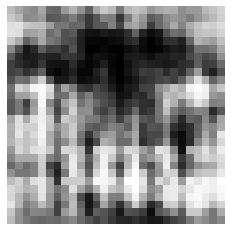

In [17]:
# example of loading the generator model and generating images
from numpy import asarray
from numpy.random import randn
from numpy.random import randint
from keras.models import load_model
from matplotlib import pyplot

# generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples, n_classes=4):
	# generate points in the latent space
	x_input = randn(latent_dim * n_samples)
	# reshape into a batch of inputs for the network
	z_input = x_input.reshape(n_samples, latent_dim)
	# generate labels
	labels = randint(0, n_classes, n_samples)
	return [z_input, labels]

# create and save a plot of generated images
def save_plot(examples, n, index):
	# plot images
	for i in range(n * n):
		# define subplot
		pyplot.subplot(n, n, 1 + i)
		# turn off axis
		pyplot.axis('off')
		# plot raw pixel data
		pyplot.imshow(examples[i, :, :, 0], cmap='gray_r')
		pyplot.savefig('./generated_cgan/generated_image_{}_{}.jpg'.format(index, i))
	#pyplot.show()
            
### predict generator
# load model
#model = load_model('cgan_generator_2000epochs_128bs.h5')
#Generate fake images
for index in range(1000):
    # generate images
    latent_points, labels = generate_latent_points(100, 16)
    # specify labels
    labels = asarray([x for _ in range(4) for x in range(4)])
    # generate images
    X  = g_model.predict([latent_points, labels]) #Taking last trained model as I cannot load a model from file
    # scale from [-1,1] to [0,1]
    X = (X + 1) / 2.0
    # plot the result
    save_plot(X, 1, index)    
